# 决策树 分类树

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
#读取数据
data = pd.read_csv('C:/Users/ganziqi/Desktop/论文资料/数据/ML data3.csv')
#转换日期格式
data['date'] = pd.to_datetime(data['date'])

In [3]:
data.shape

(3898, 22)

In [4]:
data.info#探索数据

<bound method DataFrame.info of            date     TED  3M_shibor  7D_reporate  term_spread  credit_spread  \
0    2006-10-08  1.2350   0.000161       2.2443      -0.9661         1.1516   
1    2006-10-09  1.2300   0.000161       2.2596      -0.9622         1.2426   
2    2006-10-10  1.2200   0.000074       2.2491      -0.9496         1.2275   
3    2006-10-11  1.2150   0.000028       2.2455      -0.9297         1.2624   
4    2006-10-12  1.2100   0.000005       2.2468      -0.9136         1.3744   
...         ...     ...        ...          ...          ...            ...   
3893 2022-05-09  0.7315   0.000161       1.8036      -0.7781         0.4007   
3894 2022-05-10  0.9073   0.000031       1.7104      -0.7783         0.3934   
3895 2022-05-11  1.5047   0.000010       1.6573      -0.7730         0.3530   
3896 2022-05-12  1.0314   0.000026       1.6464      -0.7794         0.3659   
3897 2022-05-13  1.2537   0.000020       1.6313      -0.8015         0.3595   

      SETBI_RealVol

In [5]:
cols = ['TED', '3M_shibor', '7D_reporate', 'term_spread', 'credit_spread','SETBI_RealVolatility','INDI_RealVolatility', 'COMI_RealVolatility', 'INDI_CMAX', 'COMI_CMAX','INDI_illiquidity','COMI_illiquidity','180FINI_RealVolatility','180FINI_CMAX','180FINI_illiquidity','REI_RealVolatility','REI_CMAX','REI_illiquidity','USDCNY','1Y_NDF']

In [6]:
data

,date,TED,3M_shibor,7D_reporate,term_spread,credit_spread,SETBI_RealVolatility,INDI_RealVolatility,COMI_RealVolatility,INDI_CMAX,...,COMI_illiquidity,180FINI_RealVolatility,180FINI_CMAX,180FINI_illiquidity,REI_RealVolatility,REI_CMAX,REI_illiquidity,USDCNY,1Y_NDF,risk_level
0,2006-10-08,1.2350,0.000161,2.2443,-0.9661,1.1516,3.270000e-07,0.000261,0.000331,0.000000,...,0.000000,0.000346,0.000000,0.000000,0.000472,0.026101,0.000000,2.400000e-06,0.000008,1
1,2006-10-09,1.2300,0.000161,2.2596,-0.9622,1.2426,2.460000e-07,0.000193,0.000250,0.000000,...,0.010650,0.000272,0.000000,0.007181,0.000358,0.035618,0.009699,1.320000e-06,0.000006,1
2,2006-10-10,1.2200,0.000074,2.2491,-0.9496,1.2275,1.970000e-07,0.000189,0.000283,0.000000,...,0.001923,0.000791,0.008683,0.002109,0.000291,0.070620,0.028284,9.030000e-07,0.000005,1
3,2006-10-11,1.2150,0.000028,2.2455,-0.9297,1.2624,1.490000e-07,0.000151,0.000219,0.000000,...,0.000372,0.000657,0.008975,0.000110,0.000525,0.067819,0.004678,7.680000e-07,0.000004,1
4,2006-10-12,1.2100,0.000005,2.2468,-0.9136,1.3744,2.050000e-07,0.000120,0.000166,0.005577,...,0.005262,0.000530,0.018758,0.003669,0.000401,0.089877,0.031501,7.780000e-07,0.000003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2022-05-09,0.7315,0.000161,1.8036,-0.7781,0.4007,3.270000e-07,0.000261,0.000331,0.227238,...,0.000182,0.000346,0.263679,0.000308,0.000472,0.111315,0.000415,2.400000e-06,0.000008,1
3894,2022-05-10,0.9073,0.000031,1.7104,-0.7783,0.3934,2.500000e-07,0.000193,0.000254,0.219085,...,0.000552,0.000279,0.256579,0.000343,0.000361,0.099843,0.001060,4.120000e-05,0.000006,1
3895,2022-05-11,1.5047,0.000010,1.6573,-0.7730,0.3530,2.150000e-07,0.000167,0.000256,0.209045,...,0.000004,0.000233,0.256746,0.000007,0.000306,0.121919,0.001799,2.430000e-05,0.000008,1
3896,2022-05-12,1.0314,0.000026,1.6464,-0.7794,0.3659,1.610000e-07,0.000160,0.000193,0.208873,...,0.000003,0.000178,0.261171,0.000301,0.000368,0.134979,0.001406,1.350000e-05,0.000012,1


In [7]:
from sklearn.model_selection import train_test_split
# data['risk_level']=data['risk_level'].shift(30)
# data = data[data['risk_level'].notna()]#删除某列中含有缺失值的行
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[cols],data['risk_level'],test_size=0.3,random_state = 0)

In [8]:
Xtrain.shape

(2728, 20)

In [9]:
Xtest.shape

(1170, 20)

In [10]:
Ytrain.shape

(2728,)

In [11]:
Ytest.shape

(1170,)

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy")  #实例化
clf = clf.fit(Xtrain,Ytrain)  #fit
score = clf.score(Xtest,Ytest)  #返回预测准确度accuracy

score

0.9393162393162393

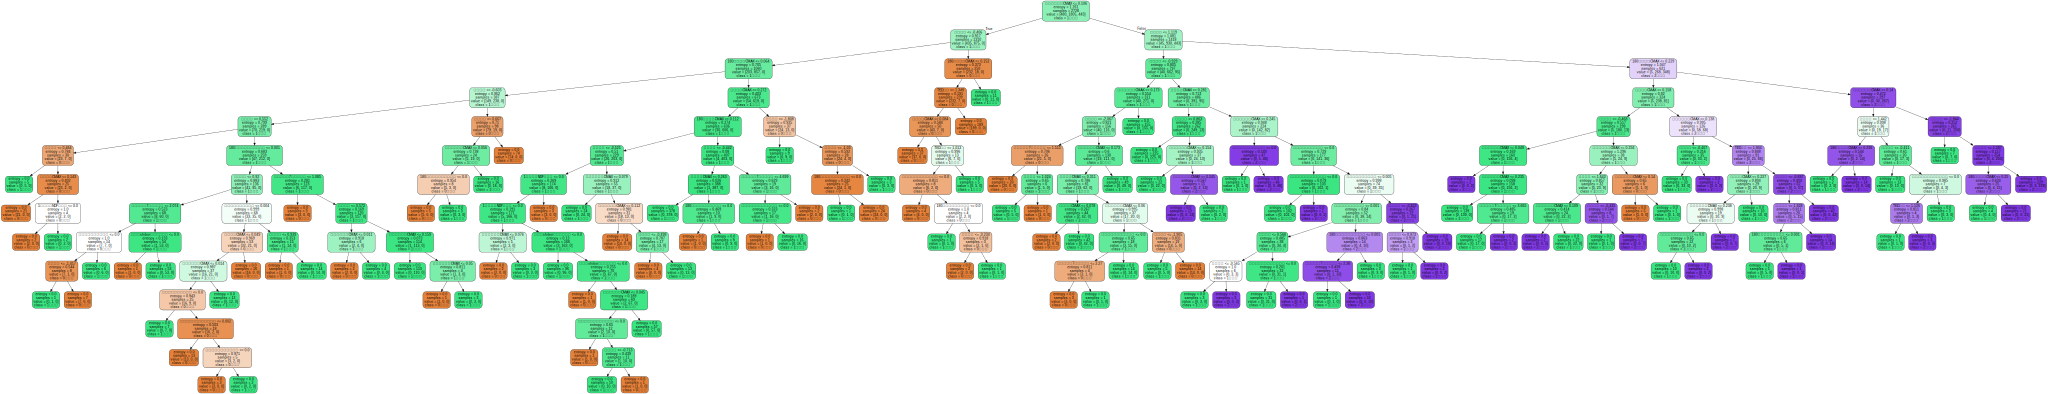

In [13]:
feature_name = ['TED利差','三个月shibor的实际波动率','银行间市场7日回购利率','期限利差','信用利差','中债综合指数的波动率','上证工业指数实际波动率','上证商业指数实际波动率','上证工业指数CMAX','上证商业指数CMAX','上证工业指数股票非流动性','上证商业指数股票非流动性','180金融指数实际波动率','180金融指数CMAX','180金融指数股票非流动性','地产指数的实际波动率','地产指数CMAX','地产指数股票非流动性','美元兑人民币汇率波动率','1年期离岸NDF波动率']
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names = feature_name
                               ,class_names = ["0低风险","1中风险","2高风险"]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [14]:
clf.feature_importances_

array([0.01519699, 0.0045874 , 0.01945441, 0.22912426, 0.13737619,
       0.        , 0.00386865, 0.        , 0.27702623, 0.04398294,
       0.00687391, 0.00281669, 0.0014955 , 0.1200864 , 0.0139267 ,
       0.02029509, 0.07796645, 0.01456218, 0.00429651, 0.00706351])

In [15]:
[*zip(feature_name,clf.feature_importances_)]

[('TED利差', 0.015196990248782224),
 ('三个月shibor的实际波动率', 0.004587403960103047),
 ('银行间市场7日回购利率', 0.019454407856774998),
 ('期限利差', 0.22912426022789953),
 ('信用利差', 0.13737619027853867),
 ('中债综合指数的波动率', 0.0),
 ('上证工业指数实际波动率', 0.003868652509833298),
 ('上证商业指数实际波动率', 0.0),
 ('上证工业指数CMAX', 0.27702622981981034),
 ('上证商业指数CMAX', 0.04398293876756734),
 ('上证工业指数股票非流动性', 0.006873911638118847),
 ('上证商业指数股票非流动性', 0.002816685168887505),
 ('180金融指数实际波动率', 0.0014955001449773373),
 ('180金融指数CMAX', 0.1200863963820997),
 ('180金融指数股票非流动性', 0.013926701680997784),
 ('地产指数的实际波动率', 0.020295085532308264),
 ('地产指数CMAX', 0.0779664475281312),
 ('地产指数股票非流动性', 0.014562175860698625),
 ('美元兑人民币汇率波动率', 0.0042965139012676595),
 ('1年期离岸NDF波动率', 0.007063508493203604)]

<Figure size 480x480 with 0 Axes>

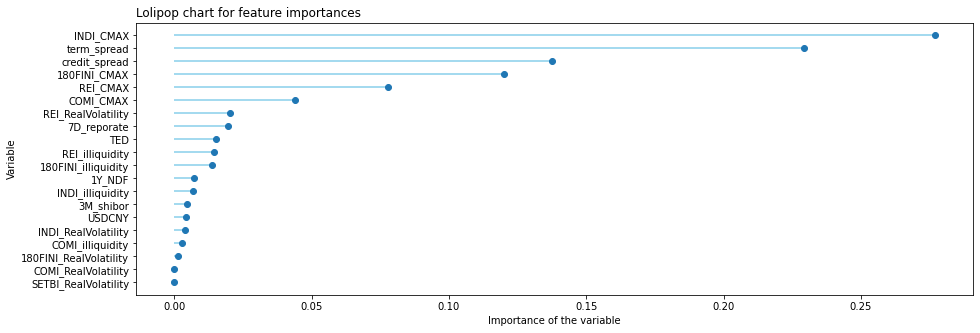

In [17]:
#棒棒糖图
#棒棒糖图
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.DataFrame({'group':cols, 'values':clf.feature_importances_})
my_dpi=96    #画出来图形会窄一点
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
ordered_df = df.sort_values(by='values')
plt.figure(figsize=(15, 5))
plt.hlines(y=range(len(cols)), xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], range(len(cols)), "o")
plt.yticks(range(len(cols)), ordered_df['group'])
plt.title("Lolipop chart for feature importances", loc='left')
plt.xlabel('Importance of the variable')
plt.ylabel('Variable')
plt.show()

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)#random_state没有特殊含义，score越高越好
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)#返回预测的准确度
score

0.9393162393162393

In [19]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=0
                                 ,splitter="random"#可以不写，以追求分数最高为主
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9153846153846154

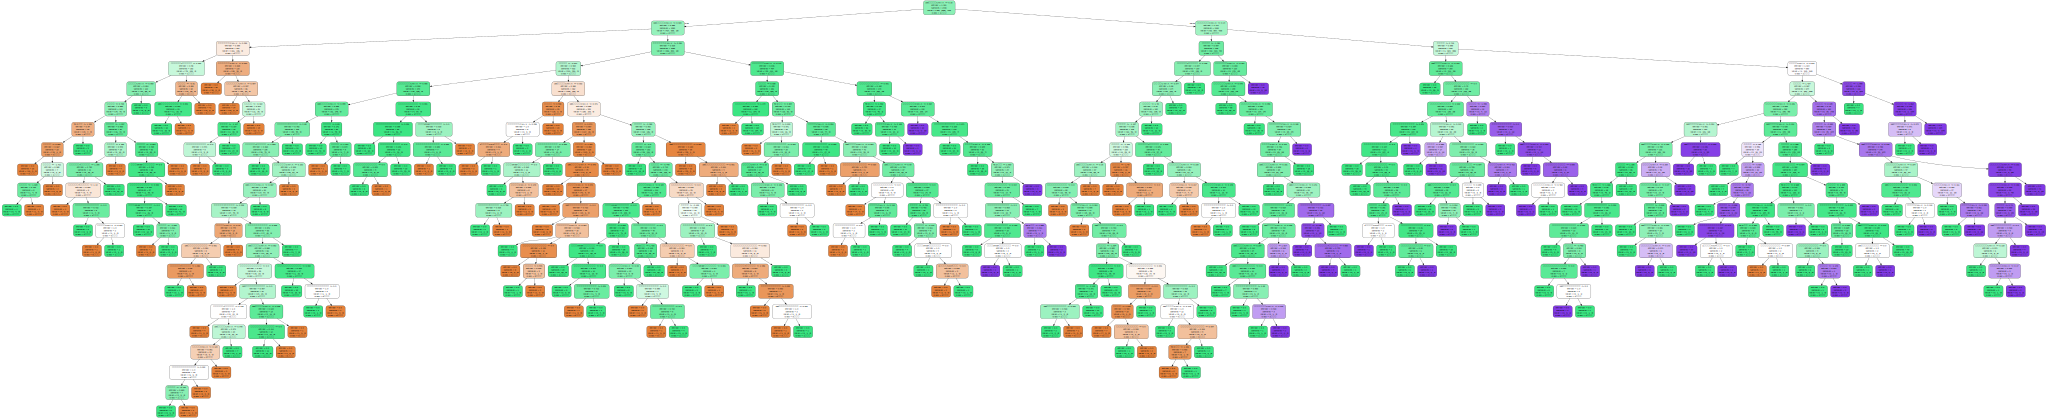

In [20]:
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names= feature_name
                               ,class_names=["0低风险","1中风险","2高风险"]
                               ,filled=True
                               ,rounded=True
                               )  
graph = graphviz.Source(dot_data)
graph

In [21]:
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

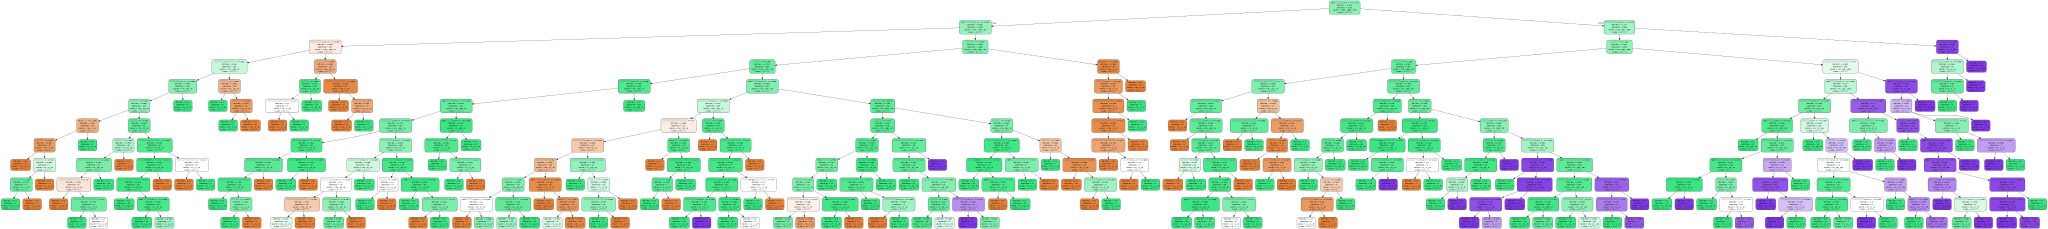

In [22]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=0
                                 ,splitter="random"
                                 ,max_depth=11
                                 #,min_samples_leaf=20
                                 #,min_samples_split=10
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                               ,feature_names= feature_name
                               ,class_names=["0低风险","1中风险","2高风险"]
                               ,filled=True
                               ,rounded=True
                               )  
graph = graphviz.Source(dot_data)
graph

In [23]:
score = clf.score(Xtest,Ytest)
score

0.9290598290598291

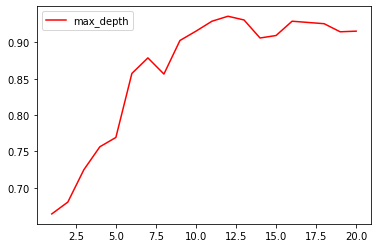

In [24]:
#超参数曲线进行判断最优剪枝参数
#最优max_depth为7
import matplotlib.pyplot as plt
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=0
                                      ,splitter="random"
                                      )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,21),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
evaluates = ['accuracy','precision','recall','f1']
y_train_pred = clf.predict(Xtrain)
y_test_pred = clf.predict(Xtest)
# accuracy
train_accuracy = clf.score(Xtrain, Ytrain)
test_accuracy = clf.score(Xtest, Ytest)
# precision
train_precision_macro = precision_score(Ytrain, y_train_pred,average="macro")
test_precision_macro = precision_score(Ytest, y_test_pred,average="macro")
train_precision_micro = precision_score(Ytrain, y_train_pred,average="micro")
test_precision_micro = precision_score(Ytest, y_test_pred,average="micro")
# recall
train_recall_macro = recall_score(Ytrain, y_train_pred,average="macro")
test_recall_macro = recall_score(Ytest, y_test_pred,average="macro")
train_recall_micro = recall_score(Ytrain, y_train_pred,average="micro")
test_recall_micro = recall_score(Ytest, y_test_pred,average="micro")
# f1
train_f1_macro = f1_score(Ytrain, y_train_pred,average="macro")
test_f1_macro = f1_score(Ytest, y_test_pred,average="macro")
train_f1_micro = f1_score(Ytrain, y_train_pred,average="micro")
test_f1_micro = f1_score(Ytest, y_test_pred,average="micro")

print("训练集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_macro,train_recall_macro,train_f1_macro))
print("测试集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro))
print("训练集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_micro,train_recall_micro,train_f1_micro))   
print("测试集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro))

训练集macro:accuracy is 1.000000,precision is 1.000000,recall is 1.000000,f1 is 1.000000
测试集macro:accuracy is 0.915385,precision is 0.893474,recall is 0.892007,f1 is 0.892729
训练集micro:accuracy is 1.000000,precision is 1.000000,recall is 1.000000,f1 is 1.000000
测试集micro:accuracy is 0.915385,precision is 0.915385,recall is 0.915385,f1 is 0.915385


In [26]:
#kappa系数是用在统计学中评估一致性的一种方法，取值范围是[-1,1]，实际应用中，一般是[0,1]
#与ROC曲线中一般不会出现下凸形曲线的原理类似。这个系数的值越高，则代表模型实现的分类准确度越高。
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(Ytest,y_test_pred)
kappa

0.8312443453087734

In [27]:
#海明距离也适用于多分类的问题，简单来说就是衡量预测标签与真实标签之间的距离，取值在0~1之间。
#距离为0说明预测结果与真实结果完全相同，距离为1就说明模型与我们想要的结果完全就是背道而驰。
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(Ytest,y_test_pred)
ham_distance

0.08461538461538462

In [28]:
#混淆矩阵

In [29]:
from sklearn.metrics import confusion_matrix
ypred=clf.predict(Xtest)
print(ypred)
# 混淆矩阵，对角线为正确，其他为误分类
confusion_matrix(Ytest,ypred,labels=(2,1,0))

[1 0 0 ... 1 1 1]


array([[196,  22,   0],
       [ 23, 728,  26],
       [  0,  28, 147]], dtype=int64)

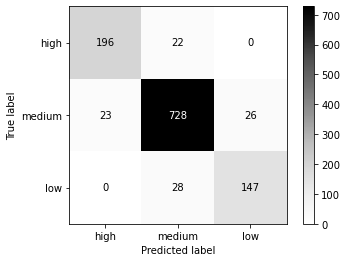

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
# 使用sklearn工具包中的ConfusionMatrixDisplay可视化混淆矩阵，参考plot_confusion_matrix
classes = ('high','medium','low')
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Ytest,ypred,labels=(2,1,0)),display_labels = classes)
disp.plot(
    include_values = True,            # 混淆矩阵每个单元格上显示具体数值
    cmap = plt.get_cmap("Greys"),                 # 不清楚啥意思，没研究，使用的sklearn中的默认值
    ax = None,                        # 同上
    xticks_rotation = "horizontal",   # 同上
    values_format = "d"               # 显示的数值格式
)
plt.show()

# 随机森林

In [1]:
from sklearn.ensemble import RandomForestClassifier#随机森林分类器
from sklearn.model_selection import GridSearchCV#网格搜索
from sklearn.model_selection import cross_val_score#交叉验证
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#导入数据
data = pd.read_csv('C:/Users/ganziqi/Desktop/论文资料/数据/ML data3.csv')
#转换日期格式
data['date'] = pd.to_datetime(data['date'])

In [3]:
data.shape

(3898, 22)

In [4]:
cols = ['TED', '3M_shibor', '7D_reporate', 'term_spread', 'credit_spread','SETBI_RealVolatility','INDI_RealVolatility', 'COMI_RealVolatility', 'INDI_CMAX', 'COMI_CMAX','INDI_illiquidity','COMI_illiquidity','180FINI_RealVolatility','180FINI_CMAX','180FINI_illiquidity','REI_RealVolatility','REI_CMAX','REI_illiquidity','USDCNY','1Y_NDF']

In [5]:
from sklearn.model_selection import train_test_split
# data['risk_level']=data['risk_level'].shift(30)
# data = data[data['risk_level'].notna()]#删除某列中含有缺失值的行
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[cols],data['risk_level'],test_size=0.3,random_state = 0)

In [6]:
rfc = RandomForestClassifier(n_estimators=100,random_state=10)#实例化
score_pre = cross_val_score(rfc,data[cols],data['risk_level'],cv=10).mean()#交叉验证，全数据集
score_pre

0.6996130775822292

0.7057682420407356 191


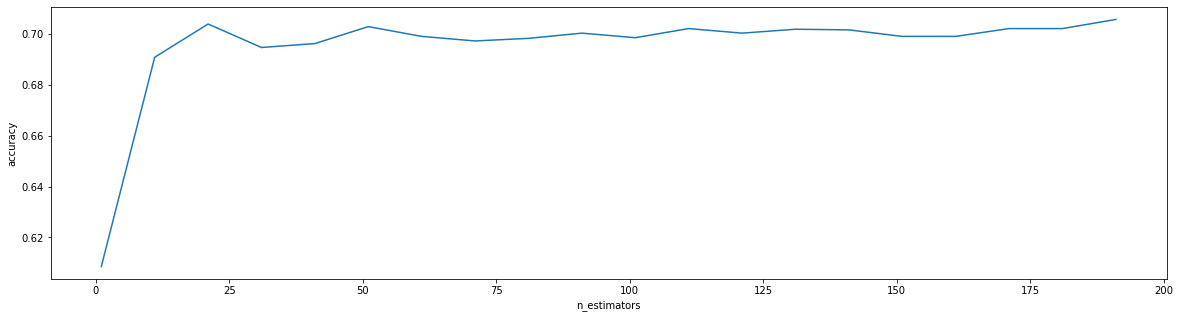

In [39]:
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""

#####【TIME WARNING: 30 seconds】#####

scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=10)
    score = cross_val_score(rfc,data[cols],data['risk_level'],cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
#list.index([object])
#返回这个object在列表list中的索引

0.7057682420407356 191


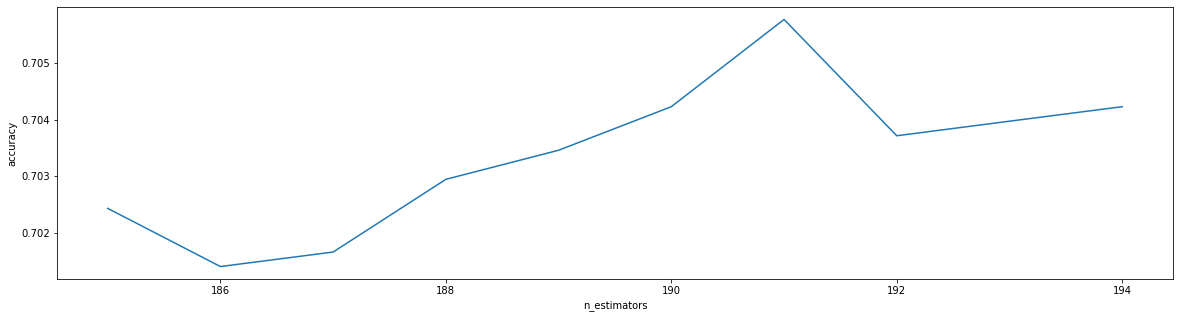

In [41]:
scorel = []
for i in range(185,195):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=10)
    score = cross_val_score(rfc,data[cols],data['risk_level'],cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(185,195)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(185,195),scorel)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [42]:
#调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
#一般根据数据的大小来进行一个试探，可以采用1~10，或者1~20这样的试探
# 但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
# 更应该画出学习曲线，来观察深度对模型的影响
rfc = RandomForestClassifier(n_estimators=191
                             ,random_state=10
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data[cols],data['risk_level'])

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=191,
                                              random_state=10),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [43]:
GS.best_params_#显示调整出来的最佳参数

{'max_depth': 4}

In [44]:
GS.best_score_#返回调整正好的最佳参数对应的准确率
#比调参之前的准确率升高，说明泛化误差下降，模型复杂度在右侧

0.7419260431085624

In [45]:
#调整max_features
param_grid = {'max_features':np.arange(4,19,1)} 
"""
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
"""
rfc = RandomForestClassifier(n_estimators=191
                             ,random_state=10
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data[cols],data['risk_level'])

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=191,
                                              random_state=10),
             param_grid={'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])})

In [46]:
GS.best_params_

{'max_features': 4}

In [47]:
GS.best_score_
#准确度降低，说明模型本身已经处于泛化误差最低点，已经达到了模型的预测上限，没有参数可以左右的部分。

0.7057682420407356

In [48]:
#调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
rfc = RandomForestClassifier(n_estimators=191
                             ,random_state=10
                             )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data[cols],data['risk_level'])

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=191,
                                              random_state=10),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [49]:
GS.best_params_

{'min_samples_leaf': 8}

In [50]:
GS.best_score_

0.7275697053589084

In [51]:
#调整min_samples_split
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=191
                             ,random_state=10
                           )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data[cols],data['risk_level'])

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=191,
                                              random_state=10),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [52]:
GS.best_params_

{'min_samples_split': 19}

In [53]:
GS.best_score_

0.7165453826379276

In [54]:
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=191
                             ,random_state=10
                           )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data[cols],data['risk_level'])

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=191,
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy']})

In [55]:
GS.best_params_

{'criterion': 'entropy'}

In [56]:
GS.best_score_

0.7355118317843254

In [7]:
rfc = RandomForestClassifier(n_estimators=191
                             ,random_state=10
                             ,criterion="entropy"
                              ,max_depth=4
                             ,max_features=4
                             ,min_samples_leaf=8
                             ,min_samples_split=19
                             )
score = cross_val_score(rfc,data[cols],data['risk_level'],cv=10).mean()
score#调完参数之后的分数

0.7570555665414277

In [8]:
score - score_pre#调参分数增加值

0.05744248895919846

In [9]:
feature_name = ['TED利差','三个月shibor的实际波动率','银行间市场7日回购利率','期限利差','信用利差','中债综合指数的波动率','上证工业指数实际波动率','上证商业指数实际波动率','上证工业指数CMAX','上证商业指数CMAX','上证工业指数股票非流动性','上证商业指数股票非流动性','180金融指数实际波动率','180金融指数CMAX','180金融指数股票非流动性','地产指数的实际波动率','地产指数CMAX','地产指数股票非流动性','美元兑人民币汇率波动率','1年期离岸NDF波动率']

In [10]:
rfc = rfc.fit(Xtrain,Ytrain)
score = rfc.score(Xtest,Ytest)
score

0.8641025641025641

In [11]:
rfc.feature_importances_

array([1.88830127e-02, 2.14432676e-03, 5.42011996e-02, 1.57512853e-01,
       7.91126428e-02, 5.81595412e-05, 1.12551830e-03, 1.03845314e-03,
       2.22171410e-01, 8.18636072e-02, 1.66823253e-02, 1.55528301e-02,
       1.16997908e-03, 1.77011927e-01, 2.23568246e-02, 2.62574018e-03,
       9.99269891e-02, 4.29810461e-02, 7.95888216e-04, 2.78526663e-03])

In [12]:
[*zip(feature_name,rfc.feature_importances_)]

[('TED利差', 0.018883012668989542),
 ('三个月shibor的实际波动率', 0.0021443267569727607),
 ('银行间市场7日回购利率', 0.054201199597078684),
 ('期限利差', 0.15751285340371898),
 ('信用利差', 0.07911264281174064),
 ('中债综合指数的波动率', 5.8159541222174225e-05),
 ('上证工业指数实际波动率', 0.001125518301545362),
 ('上证商业指数实际波动率', 0.0010384531391120885),
 ('上证工业指数CMAX', 0.22217141022965223),
 ('上证商业指数CMAX', 0.0818636072152478),
 ('上证工业指数股票非流动性', 0.016682325288944956),
 ('上证商业指数股票非流动性', 0.015552830069417854),
 ('180金融指数实际波动率', 0.0011699790768438688),
 ('180金融指数CMAX', 0.17701192702103302),
 ('180金融指数股票非流动性', 0.022356824621645767),
 ('地产指数的实际波动率', 0.002625740176479056),
 ('地产指数CMAX', 0.09992698911628656),
 ('地产指数股票非流动性', 0.042981046115266354),
 ('美元兑人民币汇率波动率', 0.0007958882163859671),
 ('1年期离岸NDF波动率', 0.002785266632416462)]

In [13]:
#前n个特征的特征重要性占比
sum(sorted(rfc.feature_importances_,reverse=True)[:8])

0.9147816755100242

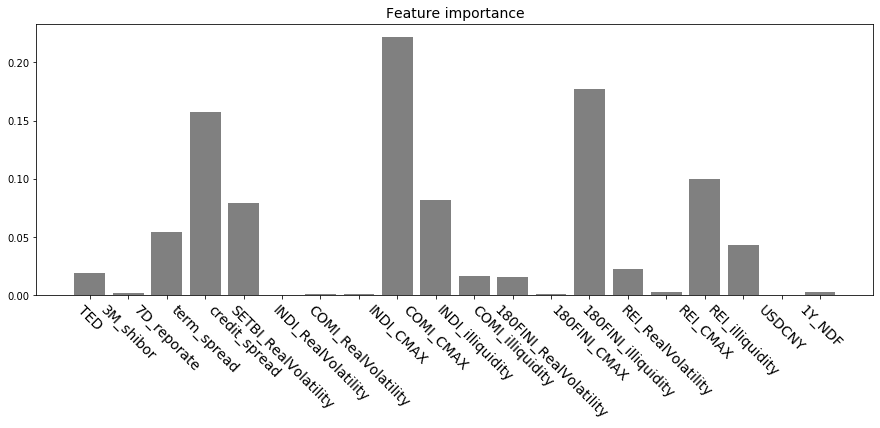

In [14]:
# 获取feature importance  条形图
plt.figure(figsize=(15, 5))
plt.bar(range(len(cols)), rfc.feature_importances_,color = "grey")
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()

C:\Users\ganziqi\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ganziqi\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


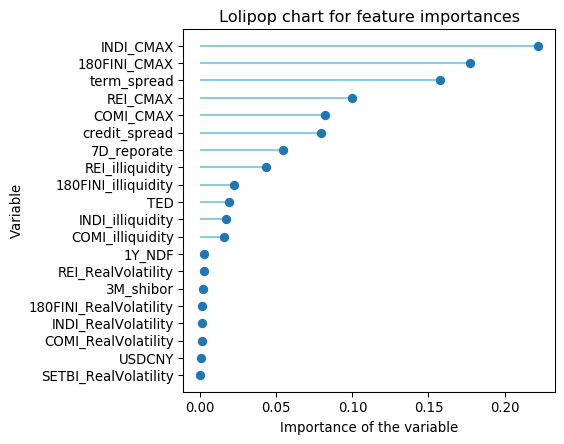

In [23]:
#棒棒糖图
#棒棒糖图
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.DataFrame({'group':cols, 'values':rfc.feature_importances_})
my_dpi=96    #画出来图形会窄一点
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
ordered_df = df.sort_values(by='values')
#plt.figure(figsize=(15, 5))
plt.hlines(y=range(len(cols)), xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], range(len(cols)), "o")
# plt.hlines(y=range(len(cols)), xmin=0, xmax=ordered_df['values'], color='grey')
# plt.plot(ordered_df['values'], range(len(cols)), "o",color = "grey")
plt.yticks(range(len(cols)), ordered_df['group'])
plt.title("Lolipop chart for feature importances", loc='center')
plt.xlabel('Importance of the variable')
plt.ylabel('Variable')
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
evaluates = ['accuracy','precision','recall','f1']
y_train_pred = rfc.predict(Xtrain)
y_test_pred = rfc.predict(Xtest)
# accuracy
train_accuracy = rfc.score(Xtrain, Ytrain)
test_accuracy = rfc.score(Xtest, Ytest)
# precision
train_precision_macro = precision_score(Ytrain, y_train_pred,average="macro")
test_precision_macro = precision_score(Ytest, y_test_pred,average="macro")
train_precision_micro = precision_score(Ytrain, y_train_pred,average="micro")
test_precision_micro = precision_score(Ytest, y_test_pred,average="micro")
# recall
train_recall_macro = recall_score(Ytrain, y_train_pred,average="macro")
test_recall_macro = recall_score(Ytest, y_test_pred,average="macro")
train_recall_micro = recall_score(Ytrain, y_train_pred,average="micro")
test_recall_micro = recall_score(Ytest, y_test_pred,average="micro")
# f1
train_f1_macro = f1_score(Ytrain, y_train_pred,average="macro")
test_f1_macro = f1_score(Ytest, y_test_pred,average="macro")
train_f1_micro = f1_score(Ytrain, y_train_pred,average="micro")
test_f1_micro = f1_score(Ytest, y_test_pred,average="micro")

print("训练集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_macro,train_recall_macro,train_f1_macro))
print("测试集macro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro))
print("训练集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(train_accuracy,train_precision_micro,train_recall_micro,train_f1_micro))   
print("测试集micro:accuracy is %f,precision is %f,recall is %f,f1 is %f"%(test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro))

训练集macro:accuracy is 0.860704,precision is 0.934345,recall is 0.730051,f1 is 0.797352
测试集macro:accuracy is 0.864103,precision is 0.928982,recall is 0.737181,f1 is 0.802503
训练集micro:accuracy is 0.860704,precision is 0.860704,recall is 0.860704,f1 is 0.860704
测试集micro:accuracy is 0.864103,precision is 0.864103,recall is 0.864103,f1 is 0.864103


In [17]:
#kappa系数是用在统计学中评估一致性的一种方法，取值范围是[-1,1]，实际应用中，一般是[0,1]
#与ROC曲线中一般不会出现下凸形曲线的原理类似。这个系数的值越高，则代表模型实现的分类准确度越高。
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(Ytest,y_test_pred)
kappa

0.6909415624870208

In [18]:
#海明距离也适用于多分类的问题，简单来说就是衡量预测标签与真实标签之间的距离，取值在0~1之间。
#距离为0说明预测结果与真实结果完全相同，距离为1就说明模型与我们想要的结果完全就是背道而驰。
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(Ytest,y_test_pred)
ham_distance

0.1358974358974359

# 混淆矩阵

In [19]:
from sklearn.metrics import confusion_matrix
ypred=rfc.predict(Xtest)
print(ypred)
# 混淆矩阵，对角线为正确，其他为误分类
confusion_matrix(Ytest,ypred,labels=(2,1,0))

[1 0 0 ... 1 1 1]


array([[135,  83,   0],
       [  4, 771,   2],
       [  0,  70, 105]], dtype=int64)

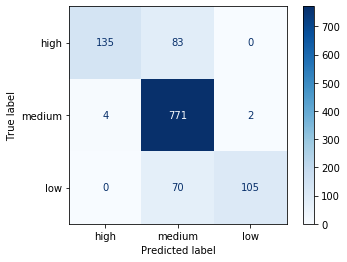

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
# 使用sklearn工具包中的ConfusionMatrixDisplay可视化混淆矩阵，参考plot_confusion_matrix
classes = ('high','medium','low')
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Ytest,ypred,labels=(2,1,0)),display_labels = classes)
disp.plot(
    include_values = True,            # 混淆矩阵每个单元格上显示具体数值
#     cmap = plt.get_cmap("Greys"),                 # 不清楚啥意思，没研究，使用的sklearn中的默认值
    cmap = plt.get_cmap("Blues"),
    ax = None,                        # 同上
    xticks_rotation = "horizontal",   # 同上
    values_format = "d"               # 显示的数值格式
)
plt.show()

# 模型结果解释

In [74]:
rfc.feature_importances_

array([1.88830127e-02, 2.14432676e-03, 5.42011996e-02, 1.57512853e-01,
       7.91126428e-02, 5.81595412e-05, 1.12551830e-03, 1.03845314e-03,
       2.22171410e-01, 8.18636072e-02, 1.66823253e-02, 1.55528301e-02,
       1.16997908e-03, 1.77011927e-01, 2.23568246e-02, 2.62574018e-03,
       9.99269891e-02, 4.29810461e-02, 7.95888216e-04, 2.78526663e-03])

In [75]:
cols = ['TED', '3M_shibor', '7D_reporate', 'term_spread', 'credit_spread','SETBI_RealVolatility','INDI_RealVolatility', 'COMI_RealVolatility', 'INDI_CMAX', 'COMI_CMAX','INDI_illiquidity','COMI_illiquidity','180FINI_RealVolatility','180FINI_CMAX','180FINI_illiquidity','REI_RealVolatility','INDI_RealVolatility', 'COMI_RealVolatility', 'INDI_CMAX', 'COMI_CMAX','INDI_illiquidity','COMI_illiquidity','180FINI_RealVolatility','180FINI_CMAX','180FINI_illiquidity','REI_RealVolatility','REI_CMAX','REI_illiquidity','USDCNY','1Y_NDF']

In [76]:
[*zip(feature_name,rfc.feature_importances_)]

[('TED利差', 0.018883012668989542),
 ('三个月shibor的实际波动率', 0.0021443267569727607),
 ('银行间市场7日回购利率', 0.054201199597078684),
 ('期限利差', 0.15751285340371898),
 ('信用利差', 0.07911264281174064),
 ('中债综合指数的波动率', 5.8159541222174225e-05),
 ('上证工业指数实际波动率', 0.001125518301545362),
 ('上证商业指数实际波动率', 0.0010384531391120885),
 ('上证工业指数CMAX', 0.22217141022965223),
 ('上证商业指数CMAX', 0.0818636072152478),
 ('上证工业指数股票非流动性', 0.016682325288944956),
 ('上证商业指数股票非流动性', 0.015552830069417854),
 ('180金融指数实际波动率', 0.0011699790768438688),
 ('180金融指数CMAX', 0.17701192702103302),
 ('180金融指数股票非流动性', 0.022356824621645767),
 ('地产指数的实际波动率', 0.002625740176479056),
 ('地产指数CMAX', 0.09992698911628656),
 ('地产指数股票非流动性', 0.042981046115266354),
 ('美元兑人民币汇率波动率', 0.0007958882163859671),
 ('1年期离岸NDF波动率', 0.002785266632416462)]